In [11]:
from openpyxl import load_workbook, Workbook

In [12]:
wb = Workbook()

In [13]:
dados = wb.active

In [17]:
dados.title = "Notas_escolares"

In [19]:
wb.save("dados.xlsx")
arquivo = "dados.xlsx"
wb = load_workbook(arquivo)
ws = wb.active

dadosxl = [
    ["Nome", "Idade", "Nota matemática", "Nota Português", "Nota Ciência"],
    ["João", 16, 8, 7, 6],
    ["Maria", 17, 19, 12, 14],
    ["Pedro", 16, 6, 9, 10],
    ["Ana", 18, 15, 20, 17]
]

for linha in dadosxl:
    ws.append(linha)


ws.insert_cols(4)
ws.insert_cols(6)
ws.insert_cols(8)
ws["D1"] = "Avaliação Matemática"
ws["F1"] = "Avaliação Português"
ws["H1"] = "Avaliação Ciências"

def avaliar(nota):
    nota = float(nota)  # Converte para número
    return "Suficiente" if nota >= 10 else "Insuficiente"

for linha in range(2, ws.max_row + 1):
    ws[f"D{linha}"] = avaliar(ws[f"C{linha}"].value)
    ws[f"F{linha}"] = avaliar(ws[f"E{linha}"].value)
    ws[f"H{linha}"] = avaliar(ws[f"G{linha}"].value)

ws_resumo = wb.create_sheet(title="Resumo")

total_alunos = ws.max_row - 1
suf_matematica = sum(1 for linha in range(2, ws.max_row + 1) if ws[f"D{linha}"].value == "Suficiente")
insuf_matematica = total_alunos - suf_matematica

suf_portugues = sum(1 for linha in range(2, ws.max_row + 1) if ws[f"F{linha}"].value == "Suficiente")
insuf_portugues = total_alunos - suf_portugues

suf_ciencias = sum(1 for linha in range(2, ws.max_row + 1) if ws[f"H{linha}"].value == "Suficiente")
insuf_ciencias = total_alunos - suf_ciencias


ws_resumo.append(["Total de alunos", total_alunos])
ws_resumo.append(["Disciplina", "Suficientes", "Insuficientes"])
ws_resumo.append(["Matemática", suf_matematica, insuf_matematica])
ws_resumo.append(["Português", suf_portugues, insuf_portugues])
ws_resumo.append(["Ciências", suf_ciencias, insuf_ciencias])

wb.save("dados_analise.xlsx")
print("Ficheiro 'dados_analise.xlsx' criado com sucesso!")

Ficheiro 'dados_analise.xlsx' criado com sucesso!


In [21]:
# exercicio 2

In [23]:
import csv


dados = [
    ["Produtos", "Categoria", "Preço", "Quantidade"],
    ["Teclado", "Informática", 20.00, 100],
    ["Mouse", "Informática", 15.00, 200],
    ["Cadeira", "Móveis", 100.00, 50],
    ["Caneca", "Utensílios", 5.00, 300],
    ["Mesa", "Móveis", 150.00, 20],
    ["Cadeira", "Móveis", 250.00, 20]
]

with open("dados.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(dados)

print("Ficheiro 'dados.csv' criado com sucesso")

with open("dados.csv", mode="r") as file:
    reader = csv.reader(file)
    header = next(reader) #lendo o cabeçalho
    produtos = [linha for linha in reader]

produtos.sort(key=lambda x: float(x[2]), reverse=True)

produtos_filtrados = [linha for linha in produtos if float(linha[2]) > 25]

with open("dados_filtrados.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)# escrevendo o cabeçalho novamente
    writer.writerow(produtos_filtrados)

print("Ficheiro 'dados_filtrados.csv' criado com sucesso")

Ficheiro 'dados.csv' criado com sucesso
Ficheiro 'dados_filtrados.csv' criado com sucesso


In [57]:
# exercicio 3

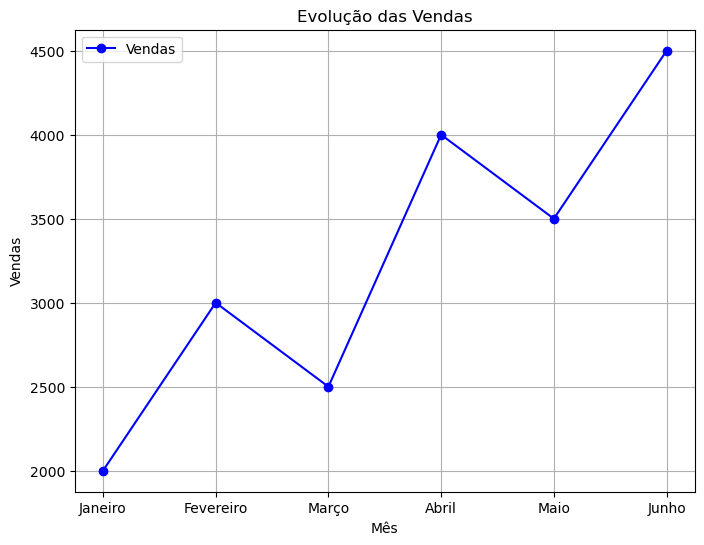

In [67]:
import matplotlib.pyplot as plt

meses = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho"]
vendas = [2000, 3000, 2500, 4000, 3500, 4500]

# Criando o gráfico
plt.figure(figsize=(8, 6))
plt.plot(meses, vendas, marker='o', color='b', label="Vendas")

plt.title("Evolução das Vendas")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.grid(True)
plt.legend()


plt.show()